<a href="https://colab.research.google.com/github/FuturisticLover123/labs/blob/main/lab9/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#task1

In [185]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
x, y = make_regression(n_samples=10, n_features=10, noise=20, n_informative=2)

In [186]:
PCA(n_components=5).fit_transform(x)

array([[ 0.08861763, -0.19021181,  1.810977  ,  0.06881318, -0.78644192],
       [-0.80050487, -0.66924691, -1.50908753,  0.06225051, -0.54220373],
       [-0.58209139, -0.49300389,  0.7158851 , -0.03146866,  0.66080873],
       [ 0.58930794, -0.55915678, -2.0457712 ,  0.5544308 ,  0.14960179],
       [ 0.2039105 ,  2.41403772,  0.41748632, -0.26730297,  0.23250014],
       [-0.15512228,  0.60749325, -0.63827406, -1.36840141, -0.92309064],
       [ 1.54328694, -1.13941863,  0.88285635,  0.92590324, -0.66069253],
       [-3.52905029, -1.23528974,  0.49261532, -0.33193264,  0.6345785 ],
       [ 3.35279332, -0.63382852,  0.08747992, -0.68497597,  0.95445931],
       [-0.71114752,  1.89862531, -0.21416721,  1.07268391,  0.28048035]])

In [228]:
class myPCA:
  def fit(self, x):
    centered = x - np.mean(x, axis = 0)
    A = (1 / (x.shape[0] - 1)) * centered.T @ centered
    eigenvalues, eigenvectors = np.linalg.eig(A)
    sorted_indices = np.argsort(eigenvalues)[::-1]

    self.c = eigenvalues[sorted_indices]
    self.vectors = eigenvectors[:, sorted_indices].T
    self.cs = np.cumsum(self.c / np.sum(self.c))
    return self

  def transform(self, x, components: int =None, p = 0.95):
    if components is not None:
      return (x - np.mean(x, axis=0)) @ self.vectors[:components].T
    return (x - np.mean(x, axis=0)) @ self.vectors[:np.argmax(self.cs > p)].T

  def fit_transform(self,x,  components:int=None, p=0.95):
    self.fit(x)
    return self.transform(x, components=components, p=p)

  def picture(self, p=0.95):
    plt.plot(np.arange(1, len(self.cs) + 1), self.cs, marker='o', linestyle='-', color='b')
    plt.axhline(y=p, color='r', linestyle='-')
    plt.grid(True)
    plt.show()


In [230]:
myPCA().fit_transform(x, components=5)

array([[-1.31870616,  0.55483257,  0.00374411,  0.43770659, -0.09442509],
       [ 1.0591004 ,  0.0972527 ,  0.88821558,  0.15425846,  0.51626874],
       [ 0.70649343,  1.09164889, -1.29658957, -0.38573125,  0.02250902],
       [-2.4402767 ,  1.18808582, -0.27043218, -0.28489651,  0.13698428],
       [ 0.54534884,  0.10316931,  0.83483527,  1.16147576, -0.08205057],
       [ 0.72361064, -0.63785984,  1.14033027, -1.18039771, -0.08821481],
       [-0.9929437 , -0.8164799 ,  1.35716434, -0.36798271, -0.1599925 ],
       [ 0.89030912,  0.34494696,  0.05500287,  0.69000461, -0.20694446],
       [-0.50935298, -2.5016914 , -1.60542323,  0.25349928,  0.08667369],
       [ 1.33641711,  0.57609489, -1.10684746, -0.47793652, -0.1308083 ]])

In [231]:
#task2

In [232]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [233]:
mypca = myPCA().fit(x)
model = LogisticRegression(max_iter=1000)

In [234]:
#дтсперсия
mypca.cs

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

In [235]:
x1c = mypca.transform(x, components=1)
cross_val_score(model, x1c, y, cv =5).mean()

0.9333333333333333

In [236]:
x2c = mypca.transform(x, components=2)
cross_val_score(model, x2c, y, cv =5).mean()

0.96

In [237]:
x3c = mypca.transform(x, components=3)
cross_val_score(model, x3c, y, cv =5).mean()

0.9733333333333334

In [238]:
# 2 оптимально

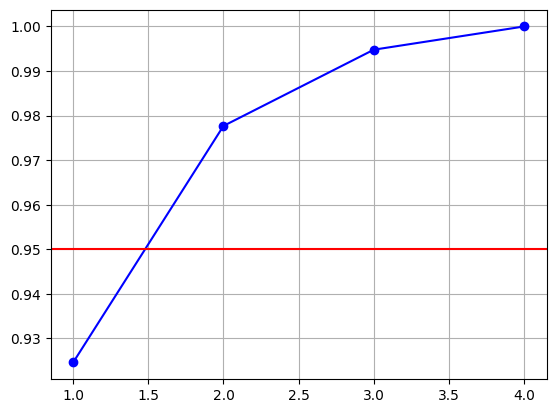

In [239]:
mypca.picture()

In [240]:
#task3

In [241]:
digits = datasets.load_digits()
x = digits.data
y = digits.target

In [242]:
pca = myPCA().fit(x)

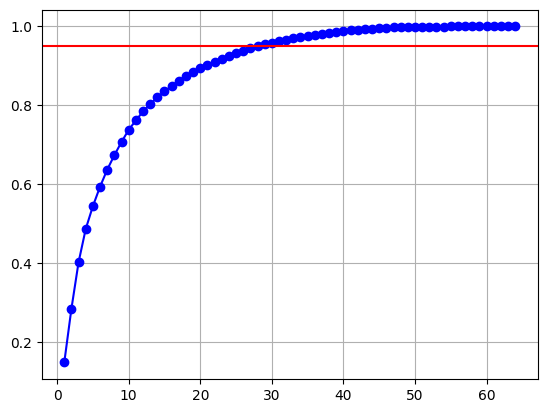

In [243]:
pca.picture()

In [244]:
import pandas as pd
from tqdm.notebook import tqdm

In [245]:
pd.DataFrame(np.array([range(1, 65), pca.cs ,[cross_val_score(model, pca.transform(x, components=component), y, cv=3).mean() for component in tqdm(range(1, 65))]]).T)

  0%|          | 0/64 [00:00<?, ?it/s]

,0,1,2
0,1.0,0.148906,0.364496
1,2.0,0.285094,0.588203
2,3.0,0.403040,0.683361
3,4.0,0.487139,0.773511
4,5.0,0.544964,0.821925
...,...,...,...
59,60.0,1.000000,0.928770
60,61.0,1.000000,0.928214
61,62.0,1.000000,0.928214
62,63.0,1.000000,0.928214


In [246]:
#task 4

In [260]:
from numpy.linalg import svd

class svdPCA:
  def __init__(self):
    pass

  def fit(self, x):
    centered = x - np.mean(x, axis = 0)
    self.u, self.s, self.v = svd(centered)
    return self

  def transform(self, x, components:int=4):
    centured = x - x.mean(axis = 0)
    return centured @ (vt.T[:, : components])

  def fit_transform(self, x, components = 4):
    self.fit(x)
    return self.transform(x, components=components)



In [261]:
x, y = make_regression(n_samples=10, n_features = 5);
centured = x - x.mean(axis=0)

In [262]:
pca = myPCA().fit(x)
svdpca = svdPCA().fit(x)

In [263]:
u, s, vt = svd(centured)

In [264]:
# сингулярные значения это корни из собственных
# главные компоненты хранятся в матрице v
(s / np.linalg.norm(s)) / (np.sqrt(pca.c) / np.linalg.norm(np.sqrt(pca.c)))

array([1., 1., 1., 1., 1.])

In [265]:
pca.fit_transform(x, components = 1)

array([[-0.5289254 ],
       [-0.14154286],
       [ 0.97208494],
       [ 0.38840188],
       [ 1.48873094],
       [ 1.70592909],
       [-0.17939728],
       [-3.30315854],
       [-0.01193876],
       [-0.390184  ]])

In [266]:
svdpca.transform(x, 1)

array([[ 0.5289254 ],
       [ 0.14154286],
       [-0.97208494],
       [-0.38840188],
       [-1.48873094],
       [-1.70592909],
       [ 0.17939728],
       [ 3.30315854],
       [ 0.01193876],
       [ 0.390184  ]])

In [ ]:
#task 5

In [ ]:
#task 6

In [267]:
import cv2

In [279]:
image = cv2.imread('tree.jpg', cv2.IMREAD_GRAYSCALE)

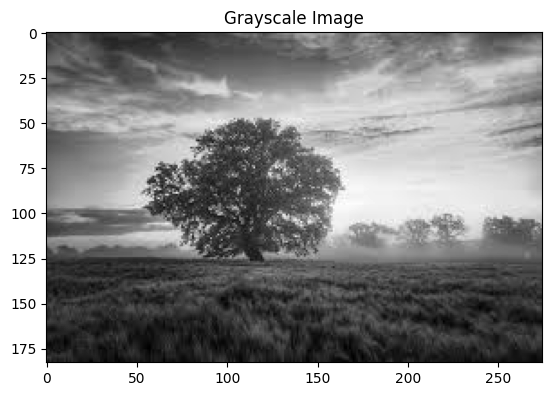

In [280]:
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

In [292]:
class picPCA(myPCA):
  def transform(self, x, components: int =None, p = 0.95):
    mean =  np.mean(x, axis=0)
    if components is not None:
      return (x - mean) @ self.vectors[:components].T + mean
    return (x - mean) @ self.vectors[:np.argmax(self.cs > p)].T + mean


In [294]:
pic = myPCA().fit(image)

In [297]:
new_pic = pic.transform(image, components = 50)

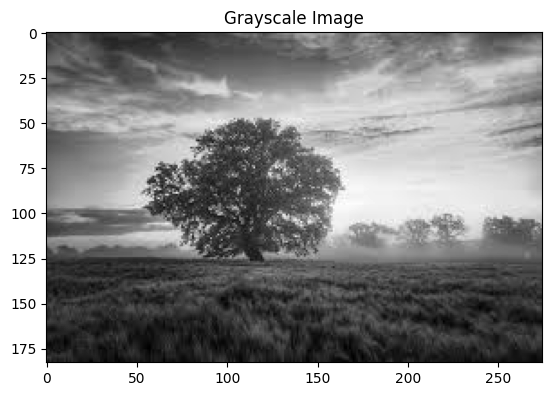

In [300]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Step 1: Image processing
image = cv2.imread('tree.jpg', cv2.IMREAD_GRAYSCALE)
flattened_image = image.flatten()

plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.show()


In [303]:

# Step 2: Computing the Covariance matrix
mean = np.mean(flattened_image)

normalized_image = flattened_image - mean
normalized_image_reshaped = normalized_image.reshape(image.shape)

cov_matrix = np.cov(normalized_image_reshaped, rowvar=False)
# Step 3: Find the Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
#print("Eigenvalues:\n", eigenvalues)
#print("\nEigenvectors:\n", eigenvectors)


In [304]:
# Step 4: Select the PCA with the desired variance
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


In [311]:
sorted_eigenvalues[:5]

array([753300.33175562+0.j,  99237.12294245+0.j,  46780.01265495+0.j,
        20267.9416286 +0.j,  16116.38587847+0.j])

In [310]:
pic.c[:5]

array([753300.33175562+0.j,  99237.12294245+0.j,  46780.01265495+0.j,
        20267.9416286 +0.j,  16116.38587847+0.j])

Top k Eigenvectors:
 [[-0.03926411+0.j -0.00717223+0.j  0.02455801+0.j ... -0.04645776+0.j
   0.07150788+0.j -0.0850377 +0.j]
 [-0.0401285 +0.j -0.00607148+0.j  0.02633222+0.j ...  0.01964602+0.j
   0.02880542+0.j -0.04319711+0.j]
 [-0.03909983+0.j -0.00439351+0.j  0.02401802+0.j ...  0.06302998+0.j
   0.08153754+0.j -0.0661975 +0.j]
 ...
 [-0.05579085+0.j  0.05640597+0.j  0.05952082+0.j ... -0.00231893+0.j
   0.03656297+0.j -0.07208851+0.j]
 [-0.05551643+0.j  0.05716505+0.j  0.06020874+0.j ...  0.0326441 +0.j
   0.0367086 +0.j -0.11238923+0.j]
 [-0.05488696+0.j  0.05769958+0.j  0.05964133+0.j ...  0.0705418 +0.j
   0.06551861+0.j -0.02199966+0.j]]


<ipython-input-317-265bd66a5207>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image = (np.dot(projected_image, top_k_eigenvectors.T) + mean).astype(float)


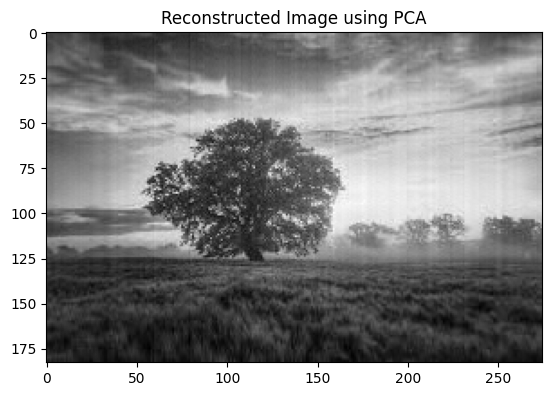

In [317]:



# Select top k principal components
k = 100  # You can change this value
top_k_eigenvectors = sorted_eigenvectors[:, :k]

print("Top k Eigenvectors:\n", top_k_eigenvectors)

# Step 5: Reconstruct the image
projected_image = np.dot(normalized_image_reshaped, top_k_eigenvectors)
reconstructed_image = (np.dot(projected_image, top_k_eigenvectors.T) + mean).astype(float)
reconstructed_image = reconstructed_image.reshape(image.shape)

plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image using PCA')
plt.show()

In [314]:
projected_image = np.dot(normalized_image_reshaped, top_k_eigenvectors)